X shape: (17631, 30, 24)
y shape: (17631,)
X_test: (100, 30, 24) y_test: (100,)


c:\Users\OWN\Documents\CIS\My Projects\predictive-maintenance-cmapss\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - loss: 5937.1357 - val_loss: 5027.3135
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 4344.7461 - val_loss: 3771.7261
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 3314.0459 - val_loss: 2927.9331
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 2640.0696 - val_loss: 2395.0471
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 2231.4207 - val_loss: 2076.1887
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 1995.3760 - val_loss: 1904.2797
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 1873.5652 - val_loss: 1819.6509
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 1832.7078 - val_loss: 1779.6799
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - loss: 1799.5431 - val_loss: 1763.8726
Epoch 10/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 1778.3556 - val_loss: 1758.1705
Epoch 11/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 71m

c:\Users\OWN\Documents\CIS\My Projects\predictive-maintenance-cmapss\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 5995.9253 - val_loss: 4983.1387
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4295.0850 - val_loss: 3713.8018
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3256.6450 - val_loss: 2879.2432
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2597.9778 - val_loss: 2358.2656
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2201.2224 - val_loss: 2054.0952
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1988.6643 - val_loss: 1890.2660
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1867.1219 - val_loss: 1810.8434
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1819.7822 - val_loss: 1777.1162
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1800.9082 - val_loss: 1763.1071
Epoch 10/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1789.3744 - val_loss: 1757.9375
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
4/4 ━━━━━━━━━━━━━━

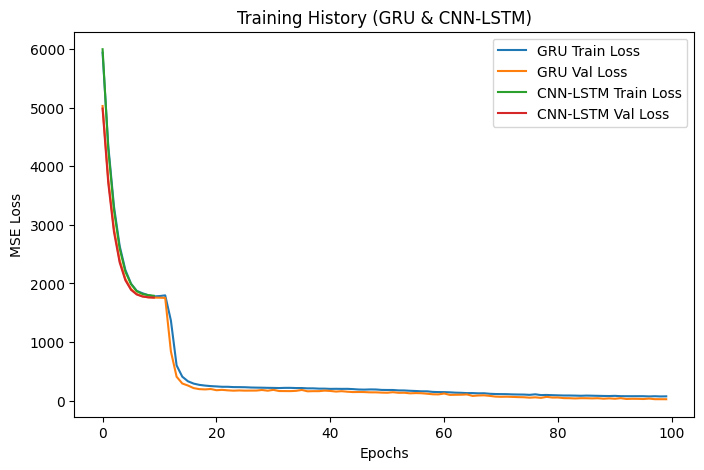

In [ ]:
# 05_other_dl_models.ipynb

# =========================
# Imports
# =========================
import numpy as np
import pandas as pd
import os, math, joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =========================
# Parameters
# =========================
SEQ_LEN = 30
DATA_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"
MAX_RUL = 125

# =========================
# Load processed training data
# =========================
X = np.load(os.path.join(PROCESSED_DIR, "X_train_fd001.npy"))
y = np.load(os.path.join(PROCESSED_DIR, "y_train_fd001.npy"))

print("X shape:", X.shape)  # (samples, seq_len, num_features)
print("y shape:", y.shape)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Helper functions
# =========================
def evaluate_and_report(model, X_val, y_val, X_test, y_test, model_name, save_path):
    """Train model and evaluate on validation + test set"""
    y_pred_val = model.predict(X_val).flatten()
    y_pred_test = model.predict(X_test).flatten()
    
    rmse_val = math.sqrt(mean_squared_error(y_val, y_pred_val))
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    
    rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"\n✅ {model_name} Validation → RMSE: {rmse_val:.2f}, MAE: {mae_val:.2f}, R²: {r2_val:.3f}")
    print(f"✅ {model_name} Test       → RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.3f}")
    
    # Save results
    df_results = pd.DataFrame([{
        "Model": model_name,
        "RMSE_val": rmse_val, "MAE_val": mae_val, "R2_val": r2_val,
        "RMSE_test": rmse_test, "MAE_test": mae_test, "R2_test": r2_test
    }])
    os.makedirs("../results", exist_ok=True)
    df_results.to_csv(save_path, index=False)
    print(f"✅ Results saved to {save_path}")
    
    return df_results

# =========================
# Load official test set
# =========================
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
op_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3']
cols = ['engine_id', 'cycle'] + op_cols + sensor_cols

test_file = os.path.join(DATA_DIR, "test_FD001.txt")
rul_file = os.path.join(DATA_DIR, "RUL_FD001.txt")

test_df = pd.read_csv(test_file, sep=' ', header=None)
test_df = test_df.dropna(axis=1, how='all')
test_df.columns = cols

truth_df = pd.read_csv(rul_file, header=None)
truth_df.columns = ['RUL']

# Compute true RUL
max_cycles = test_df.groupby('engine_id')['cycle'].max().reset_index()
max_cycles.columns = ['engine_id','max_cycle']
max_cycles = max_cycles.merge(truth_df, left_index=True, right_index=True)
max_cycles['true_last_rul'] = max_cycles['RUL'] + max_cycles['max_cycle']
test_df = test_df.merge(max_cycles[['engine_id','true_last_rul']], on='engine_id')
test_df['RUL'] = test_df['true_last_rul'] - test_df['cycle']

# Apply capping
test_df['RUL'] = test_df['RUL'].clip(upper=MAX_RUL)

# Reload scaler and apply
scaler = joblib.load(os.path.join(PROCESSED_DIR, "scaler_fd001.pkl"))
test_df[op_cols + sensor_cols] = scaler.transform(test_df[op_cols + sensor_cols])

# Generate test sequences
def gen_sequence(df, seq_length, features):
    data_array = df[features].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements - seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

feature_cols = op_cols + sensor_cols
X_test, y_test = [], []
for eid in test_df['engine_id'].unique():
    engine_df = test_df[test_df['engine_id']==eid]
    seqs = list(gen_sequence(engine_df, SEQ_LEN, feature_cols))
    if len(seqs) > 0:
        X_test.append(seqs[-1])   # last sequence
        y_test.append(engine_df['RUL'].values[-1])

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test:", X_test.shape, "y_test:", y_test.shape)

# =========================
# Model 1: GRU
# =========================
gru_model = Sequential([
    GRU(128, input_shape=(SEQ_LEN, X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate GRU
df_gru = evaluate_and_report(gru_model, X_val, y_val, X_test, y_test, "GRU", "../results/gru_fd001_results.csv")



c:\Users\OWN\Documents\CIS\My Projects\predictive-maintenance-cmapss\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 6644.1055 - val_loss: 6054.1558
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 5591.4922 - val_loss: 5188.8774
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 4806.5942 - val_loss: 4472.3950
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 4162.5117 - val_loss: 3877.0908
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 3622.2083 - val_loss: 3385.8926
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 3185.1785 - val_loss: 2986.7983
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 2838.8433 - val_loss: 2666.1946
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 2554.3425 - val_loss: 2413.3687
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 2338.3662 - val_loss: 2218.3630
Epoch 10/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 2176.2068 - val_loss: 2073.2920
Epoch 11/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - l

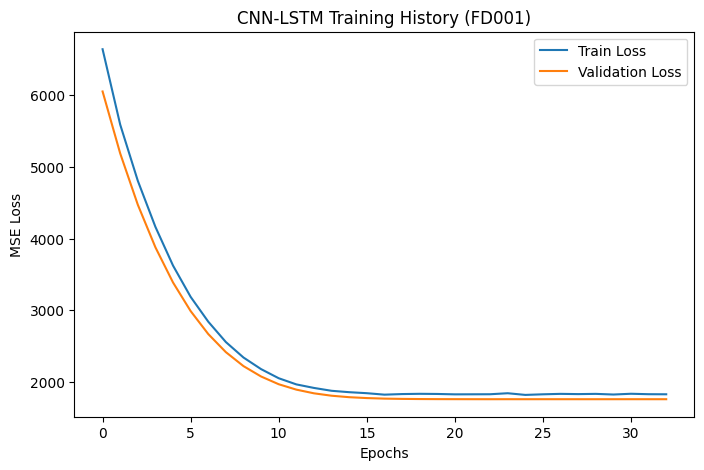

In [2]:
# =========================
# Model 2: CNN-LSTM (improved)
# =========================

cnn_lstm_model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(SEQ_LEN, X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')

# Fresh early stopping (not shared with GRU)
early_stop_cnnlstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history_cnnlstm = cnn_lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop_cnnlstm],
    verbose=1
)

# Evaluate CNN-LSTM
df_cnnlstm = evaluate_and_report(
    cnn_lstm_model, 
    X_val, y_val, 
    X_test, y_test, 
    "CNN-LSTM", 
    "../results/cnnlstm_fd001_results.csv"
)

# Plot CNN-LSTM history
plt.figure(figsize=(8,5))
plt.plot(history_cnnlstm.history['loss'], label='Train Loss')
plt.plot(history_cnnlstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('CNN-LSTM Training History (FD001)')
plt.legend()
plt.show()
